# Стохастический градиентный спуск (SGD)

Ниже два задания:
1. Обычный стохастический градиентный спуск (по одной точке).
2. Мини-батч SGD (по K точек).


In [140]:
import numpy as np
import matplotlib.pyplot as plt


In [141]:
# Целевая функция (то, что аппроксимируем)
def func(x):
    return 0.5 * x**2 - 0.1 * 1/np.exp(-x) + 0.5 * np.cos(2*x) - 2.

# Градиент по одной точке (stochastic)
def compute_gradient_compact(w, S, f_targets):
    errors = np.dot(S, w) - f_targets
    return 2 * errors * S

# Квадратичная ошибка для одной точки
def func_error(x, w, f_targets):
    return (np.dot(x, w) - f_targets) ** 2

# Средний эмпирический риск
def average_risk(w, x, f_targets):
    errors = (np.dot(x, w) - f_targets) ** 2
    return np.mean(errors)


In [142]:
# Данные
coord_x = np.arange(-5.0, 5.0, 0.1)
coord_y = func(coord_x)

# Гиперпараметры
sz = len(coord_x)
eta = np.array([0.01, 0.001, 0.0001, 0.01, 0.01])
w = np.array([0., 0., 0., 0., 0.])
N = 500
lm = 0.02

# Матрица признаков
S = np.column_stack([
    np.ones(sz),
    coord_x,
    coord_x**2,
    np.cos(2*coord_x),
    np.sin(2*coord_x)
])

Qe = average_risk(w, S, coord_y)
np.random.seed(0)


In [143]:
# Обучение (SGD по одной точке)
Qe_hist = []
for i in range(N):
    k = np.random.randint(0, sz)
    ek = func_error(S[k], w, coord_y[k])
    w = w - eta * compute_gradient_compact(w, S[k], coord_y[k])
    Qe = lm * ek + (1 - lm) * Qe
    Qe_hist.append(Qe)

Q = average_risk(w, S, coord_y)
print(f"{Q=},{Qe=}")


Q=np.float64(1.4323446928853572),Qe=np.float64(1.8143849337851585)


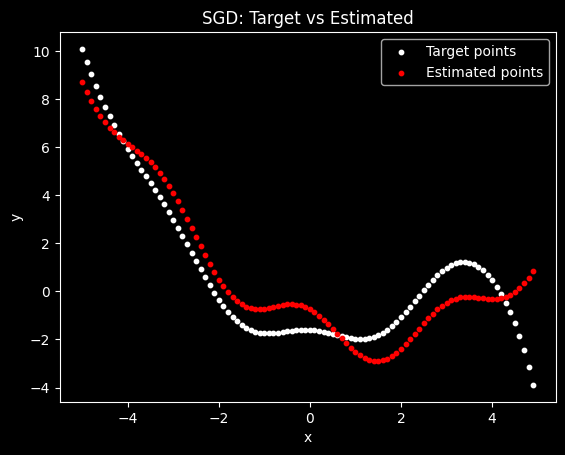

In [144]:
# График: цель и модель (SGD)
plt.scatter(coord_x, coord_y, color='white', s=10, label="Target points")

model = (
    w[0]
    + w[1] * coord_x
    + w[2] * coord_x**2
    + w[3] * np.cos(2*coord_x)
    + w[4] * np.sin(2*coord_x)
)

plt.scatter(coord_x, model, color='red', s=10, label="Estimated points")
plt.title("SGD: Target vs Estimated")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


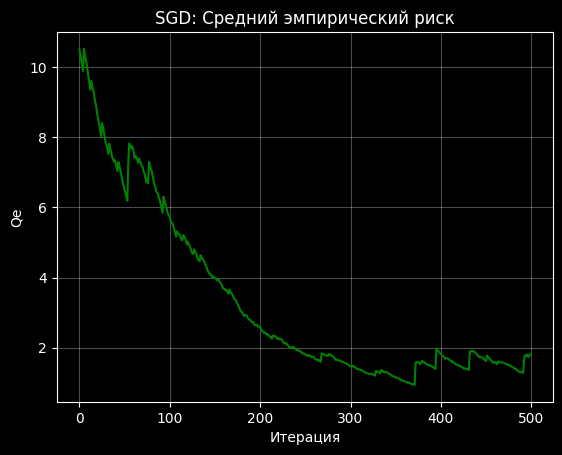

In [145]:
# График: изменение среднего эмпирического риска (SGD)
plt.plot(Qe_hist, color='green')
plt.title("SGD: Средний эмпирический риск")
plt.xlabel("Итерация")
plt.ylabel("Qe")
plt.grid(True, alpha=0.3)
plt.show()


# Задание 2
**Мини-батч SGD (по K точек)**


In [146]:
# Целевая функция (вторая задача)
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5

# Градиент по мини-батчу
def compute_gradient_compact(w, S, f_targets):
    n = S.shape[0]
    errors = np.dot(S, w) - f_targets
    return (2 * np.dot(errors, S)) / n

# Квадратичная ошибка
def func_error(x, w, f_targets):
    return (np.dot(x, w) - f_targets) ** 2

# Средний эмпирический риск
def average_risk(w, x, f_targets):
    errors = (np.dot(x, w) - f_targets) ** 2
    return np.mean(errors)


In [147]:
# Данные
coord_x = np.arange(-4.0, 6.0, 0.1)
coord_y = func(coord_x)

# Гиперпараметры
sz = len(coord_x)
eta = np.array([0.1, 0.01, 0.001, 0.0001])
w = np.array([0., 0., 0., 0.])
N = 500
lm = 0.02
batch_size = 50

# Матрица признаков
S = np.column_stack([
    np.ones(sz),
    coord_x,
    coord_x**2,
    coord_x**3
])

Qe = average_risk(w, S, coord_y)
np.random.seed(0)


In [148]:
# Обучение (mini-batch SGD)
Qe_hist = []
for i in range(N):
    k = np.random.randint(0, sz - batch_size)
    S_batch = S[k:k + batch_size]
    Y_batch = coord_y[k:k + batch_size]
    ek = func_error(S_batch, w, Y_batch)
    w = w - eta * compute_gradient_compact(w, S_batch, Y_batch)
    Qe = np.mean(lm * ek + (1 - lm) * Qe)
    Qe_hist.append(Qe)

Q = average_risk(w, S, coord_y)
print(f"{Q=},{Qe=}")


Q=np.float64(0.020109890217551937),Qe=np.float64(0.020393424082993956)


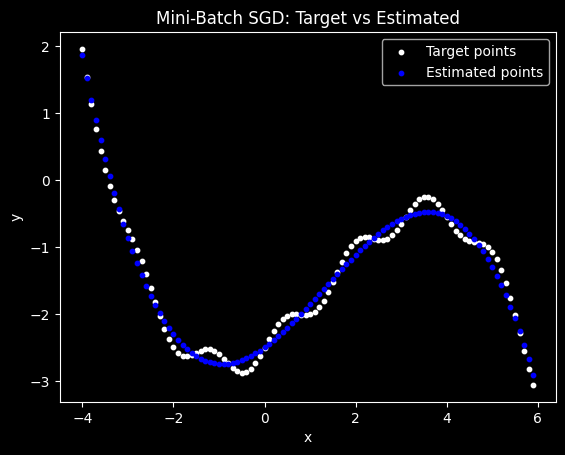

In [149]:
# График: цель и модель (mini-batch SGD)
plt.scatter(coord_x, coord_y, color='white', s=10, label="Target points")

model = (
    w[0]
    + w[1] * coord_x
    + w[2] * coord_x**2
    + w[3] * coord_x**3
)

plt.scatter(coord_x, model, color='blue', s=10, label="Estimated points")
plt.title("Mini-Batch SGD: Target vs Estimated")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


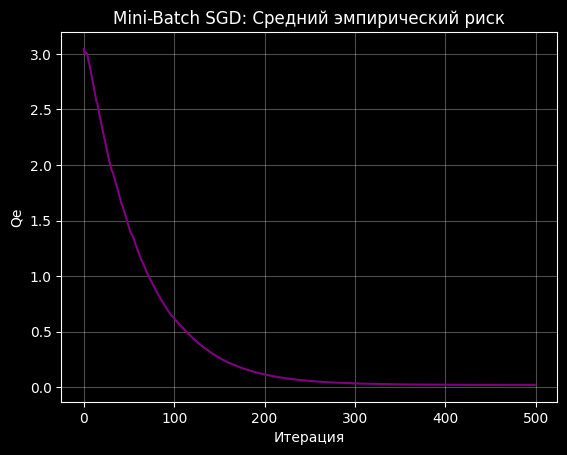

In [150]:
# График: изменение среднего эмпирического риска (mini-batch SGD)
plt.plot(Qe_hist, color='purple')
plt.title("Mini-Batch SGD: Средний эмпирический риск")
plt.xlabel("Итерация")
plt.ylabel("Qe")
plt.grid(True, alpha=0.3)
plt.show()
